In [ ]:
from idlelib.editor import darwin

import numpy as np
import seaborn as sns
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [178]:
data=pd.DataFrame(sns.load_dataset("diamonds"))
data


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Case Study - Diamond Price Prediction

Business Understanding

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon.
However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for
determining its price.
The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features.
The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling.
Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics
that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people
across the world to buy diamonds, which allows ease of trade and value for what is purchased.


Understanding the 4 C's

Cut
Color
Clarity
Carat


price in us dollars
carat weight of the diamonds
cut-quality of the cut
clarity-how clear it is
x- length -in mm
y- width -in mm
z- depth -in mm

depth -total depth percentage=z_value/mean(x,y)


In [179]:
data.isnull().mean()

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [180]:
data.shape

(53940, 10)

In [181]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [183]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [184]:
data['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [185]:
data['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [186]:
data['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [187]:
data.rename({'x':'length', 'y':'width','z':'depth_per'}, axis='columns',inplace=True)


In [188]:
data

,carat,cut,color,clarity,depth,table,price,length,width,depth_per
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [189]:
data.loc[(data['length']==0) | (data['width']==0) | (data['depth_per']==0) ]

,carat,cut,color,clarity,depth,table,price,length,width,depth_per
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [190]:
data.drop (data.loc[(data['length']==0) | (data['width']==0) | (data['depth_per']==0) ].index)

,carat,cut,color,clarity,depth,table,price,length,width,depth_per
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Data preparation:

- Train test split.
- Encoding for categorical column:
- Ordinal encoding: LabelEncoding and OrdinalEncoding
- Nominal encoding: OneHotEncoding and get_dummies

- Scaling for Numerical columns:
- Normalization
- Standardization (Z- transformation)

# We are going to follow below steps:

a. Identify the traget variable and splitting the data into train and test.
b. Seperating the categorical features and numerical features.
c. Rescaling the numercial features. (standardization)
d. Applying one hot and label encoding
e. concatenating the encoded categorical and scaled numerical features

In [191]:
import pandas as pd
print(data)
df=pd.DataFrame(data)

       carat        cut color clarity  depth  table  price  length  width  \
0       0.23      Ideal     E     SI2   61.5   55.0    326    3.95   3.98   
1       0.21    Premium     E     SI1   59.8   61.0    326    3.89   3.84   
2       0.23       Good     E     VS1   56.9   65.0    327    4.05   4.07   
3       0.29    Premium     I     VS2   62.4   58.0    334    4.20   4.23   
4       0.31       Good     J     SI2   63.3   58.0    335    4.34   4.35   
...      ...        ...   ...     ...    ...    ...    ...     ...    ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757    5.75   5.76   
53936   0.72       Good     D     SI1   63.1   55.0   2757    5.69   5.75   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757    5.66   5.68   
53938   0.86    Premium     H     SI2   61.0   58.0   2757    6.15   6.12   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757    5.83   5.87   

       depth_per  
0           2.43  
1           2.31  
2           2.31  

In [192]:
# seperating input and target features.

x=df[["carat","cut","color","clarity","depth_per","table","length","width","depth"]]
y=df [["price"]]

In [193]:
x

,carat,cut,color,clarity,depth_per,table,length,width,depth
0,0.23,Ideal,E,SI2,2.43,55.0,3.95,3.98,61.5
1,0.21,Premium,E,SI1,2.31,61.0,3.89,3.84,59.8
2,0.23,Good,E,VS1,2.31,65.0,4.05,4.07,56.9
3,0.29,Premium,I,VS2,2.63,58.0,4.20,4.23,62.4
4,0.31,Good,J,SI2,2.75,58.0,4.34,4.35,63.3
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,3.50,57.0,5.75,5.76,60.8
53936,0.72,Good,D,SI1,3.61,55.0,5.69,5.75,63.1
53937,0.70,Very Good,D,SI1,3.56,60.0,5.66,5.68,62.8
53938,0.86,Premium,H,SI2,3.74,58.0,6.15,6.12,61.0


In [194]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [195]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [196]:
x_train

,carat,cut,color,clarity,depth_per,table,length,width,depth
4106,0.78,Ideal,F,VS1,3.64,56.0,5.90,5.92,61.6
11613,1.14,Premium,D,SI2,4.04,61.0,6.84,6.82,59.2
19441,1.06,Ideal,G,VS1,4.04,55.0,6.53,6.56,61.7
24086,2.01,Very Good,H,SI2,5.07,59.0,8.04,8.00,63.2
36421,0.39,Premium,G,VS2,2.83,61.0,4.75,4.72,59.8
...,...,...,...,...,...,...,...,...,...
23452,1.50,Very Good,D,SI1,4.44,62.0,7.30,7.33,60.7
23775,1.51,Ideal,D,SI1,4.57,57.0,7.35,7.42,61.9
37135,0.42,Ideal,G,SI2,2.97,56.0,4.87,4.89,60.9
27098,2.05,Premium,E,SI2,4.97,59.0,8.39,8.27,59.7


In [197]:
x_test

,carat,cut,color,clarity,depth_per,table,length,width,depth
20244,1.52,Fair,H,VS2,4.50,66.0,7.33,7.13,62.1
45013,0.54,Premium,G,VS2,3.22,58.0,5.21,5.18,62.0
53351,0.70,Premium,E,VS2,3.50,60.0,5.70,5.59,62.0
47212,0.59,Ideal,E,VS2,3.34,58.0,5.35,5.39,62.2
1460,0.86,Premium,F,SI2,3.79,58.0,6.12,6.15,61.8
...,...,...,...,...,...,...,...,...,...
35801,0.31,Very Good,F,IF,2.71,54.0,4.36,4.39,61.9
14736,1.01,Ideal,F,SI1,3.99,56.0,6.45,6.48,61.7
20694,1.53,Ideal,I,SI1,1.53,54.0,7.43,7.50,61.9
40607,0.23,Ideal,F,VS2,2.43,55.0,3.93,3.97,61.5


In [198]:
## seperating categorical and numerical columns
x_train.dtypes


carat         float64
cut          category
color        category
clarity      category
depth_per     float64
table         float64
length        float64
width         float64
depth         float64
dtype: object

In [199]:
x_train_cat=x_train.select_dtypes(include=["category"])
x_train_cat.head()

,cut,color,clarity
4106,Ideal,F,VS1
11613,Premium,D,SI2
19441,Ideal,G,VS1
24086,Very Good,H,SI2
36421,Premium,G,VS2


In [200]:
x_train_num=x_train.select_dtypes(include=["int64","float64"])
x_train_num.head()

,carat,depth_per,table,length,width,depth
4106,0.78,3.64,56.0,5.90,5.92,61.6
11613,1.14,4.04,61.0,6.84,6.82,59.2
19441,1.06,4.04,55.0,6.53,6.56,61.7
24086,2.01,5.07,59.0,8.04,8.00,63.2
36421,0.39,2.83,61.0,4.75,4.72,59.8


In [201]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_rescaled=pd.DataFrame(sc.fit_transform(x_train_num),columns=x_train_num.columns,index=x_train_num.index)
x_train_rescaled


,carat,depth_per,table,length,width,depth
4106,-0.035034,0.149621,-0.649549,0.153776,0.164718,-0.101784
11613,0.725031,0.725261,1.590477,0.991391,0.949421,-1.789532
19441,0.556127,0.725261,-1.097555,0.715156,0.722729,-0.031461
24086,2.561855,2.207534,0.694466,2.060685,1.978253,1.023382
36421,-0.858438,-1.016050,1.590477,-0.870964,-0.881552,-1.367595
...,...,...,...,...,...,...
23452,1.485096,1.300901,2.038482,1.401287,1.394086,-0.734689
23775,1.506209,1.487984,-0.201544,1.445841,1.472556,0.109185
37135,-0.795100,-0.814576,-0.649549,-0.764035,-0.733330,-0.594044
27098,2.646307,2.063624,0.694466,2.372563,2.213664,-1.437918


In [202]:
x_train_cat_le=x_train_cat['cut']
x_train_cat_le.value_counts()

cut
Ideal        15216
Premium       9580
Very Good     8466
Good          3383
Fair          1113
Name: count, dtype: int64

In [203]:
cut_encoder={"Fair":1,"Good":2,"Very Good":3,"Ideal":4,"Premium":5}
x_train_cat_le=x_train_cat["cut"].apply(lambda x:cut_encoder[x])
x_train_cat_le

4106     4
11613    5
19441    4
24086    3
36421    5
        ..
23452    3
23775    4
37135    4
27098    5
48483    5
Name: cut, Length: 37758, dtype: category
Categories (5, int64): [4, 5, 3, 2, 1]

In [204]:
x_train_cat_onehot=x_train_cat[['color','clarity']]
x_train_cat_onehot

,color,clarity
4106,F,VS1
11613,D,SI2
19441,G,VS1
24086,H,SI2
36421,G,VS2
...,...,...
23452,D,SI1
23775,D,SI1
37135,G,SI2
27098,E,SI2


In [205]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(drop='first',sparse_output=False)
one_hot_enc=pd.DataFrame(enc.fit_transform(x_train_cat_onehot),columns=enc.get_feature_names_out(['color','clarity']),index=x_train_cat_onehot.index)


one_hot_enc

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
4106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19441,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24086,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27098,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [206]:
x_train_transform=pd.concat([one_hot_enc,x_train_cat_le,x_train_rescaled],axis=1)
x_train_transform

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,carat,depth_per,table,length,width,depth
4106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,-0.035034,0.149621,-0.649549,0.153776,0.164718,-0.101784
11613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.725031,0.725261,1.590477,0.991391,0.949421,-1.789532
19441,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.556127,0.725261,-1.097555,0.715156,0.722729,-0.031461
24086,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2.561855,2.207534,0.694466,2.060685,1.978253,1.023382
36421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,-0.858438,-1.016050,1.590477,-0.870964,-0.881552,-1.367595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1.485096,1.300901,2.038482,1.401287,1.394086,-0.734689
23775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1.506209,1.487984,-0.201544,1.445841,1.472556,0.109185
37135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,-0.795100,-0.814576,-0.649549,-0.764035,-0.733330,-0.594044
27098,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,2.646307,2.063624,0.694466,2.372563,2.213664,-1.437918


2 things we have

- sparse metrix-has max  value as 0
- dense metrix-very low number of 0


In [207]:
x_test_numerical=x_test.select_dtypes(include=["int64","float64"])
x_test_numerical

,carat,depth_per,table,length,width,depth
20244,1.52,4.50,66.0,7.33,7.13,62.1
45013,0.54,3.22,58.0,5.21,5.18,62.0
53351,0.70,3.50,60.0,5.70,5.59,62.0
47212,0.59,3.34,58.0,5.35,5.39,62.2
1460,0.86,3.79,58.0,6.12,6.15,61.8
...,...,...,...,...,...,...
35801,0.31,2.71,54.0,4.36,4.39,61.9
14736,1.01,3.99,56.0,6.45,6.48,61.7
20694,1.53,1.53,54.0,7.43,7.50,61.9
40607,0.23,2.43,55.0,3.93,3.97,61.5


In [208]:
x_test_res=pd.DataFrame(sc.transform(x_test_numerical),columns=x_test_numerical.columns,index=x_test_numerical.index)
x_test_res

,carat,depth_per,table,length,width,depth
20244,1.527322,1.387247,3.830503,1.428019,1.219708,0.249831
45013,-0.541745,-0.454801,0.246461,-0.461068,-0.480481,0.179508
53351,-0.203938,-0.051853,1.142471,-0.024439,-0.123006,0.179508
47212,-0.436180,-0.282109,0.246461,-0.336317,-0.297384,0.320154
1460,0.133869,0.365486,0.246461,0.349814,0.365254,0.038862
...,...,...,...,...,...,...
35801,-1.027342,-1.188742,-1.545560,-1.218485,-1.169276,0.109185
14736,0.450563,0.653306,-0.649549,0.643870,0.652978,-0.031461
20694,1.548435,-2.886880,-1.545560,1.517127,1.542308,0.109185
40607,-1.196245,-1.591690,-1.097555,-1.601649,-1.535471,-0.172106


In [209]:
x_test_cat=x_test.select_dtypes(include=["category"])
# label encoding
cut_encoder={"Fair":1,"Good":2,"Very Good":3,"Ideal":4,"Premium":5}
x_test_cat_le=x_test_cat["cut"].apply(lambda x:cut_encoder [x] )
x_test_cat_le

20244    1
45013    5
53351    5
47212    4
1460     5
        ..
35801    3
14736    4
20694    4
40607    4
17437    4
Name: cut, Length: 16182, dtype: category
Categories (5, int64): [4, 5, 3, 2, 1]

In [210]:

# one hot
#one hot encoding for nominal type of data.
x_test_cat_onehot=x_test_cat[["color","clarity"] ]
x_test_cat_onehot.head()
encoded=enc.transform(x_test_cat[["color","clarity"] ] )
encoded = pd. DataFrame(encoded, columns=enc.get_feature_names_out( ["color","clarity"] ), index=x_test_cat_onehot. index)
encoded

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
20244,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47212,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35801,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14736,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [211]:

x_test_transfomed=pd. concat( [encoded,x_test_cat_le,x_test_res],axis=1)

x_test_transfomed.head()

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,carat,depth_per,table,length,width,depth
20244,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1.527322,1.387247,3.830503,1.428019,1.219708,0.249831
45013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,-0.541745,-0.454801,0.246461,-0.461068,-0.480481,0.179508
53351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,-0.203938,-0.051853,1.142471,-0.024439,-0.123006,0.179508
47212,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,-0.436180,-0.282109,0.246461,-0.336317,-0.297384,0.320154
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.133869,0.365486,0.246461,0.349814,0.365254,0.038862


# KNN Regression

In [212]:
from sklearn.neighbors import KNeighborsRegressor

regressor=KNeighborsRegressor()
regressor.fit(x_train_transform,y_train)
# teaching the model




,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [213]:
#validating the model

y_test_pred=regressor.predict(x_test_transfomed)
y_test_pred=y_test_pred.flatten()

In [214]:
import numpy as np
y=np.ravel(y_test)

In [215]:
temp_df = pd.DataFrame({
    "Actual": y,
    "Predicted": y_test_pred
})

In [216]:
temp_df

,Actual,Predicted
0,8674,5820.8
1,1637,1720.8
2,2657,2870.2
3,1838,1906.4
4,2980,3541.2
...,...,...
16177,914,889.0
16178,5932,5588.4
16179,8971,10965.8
16180,498,533.2


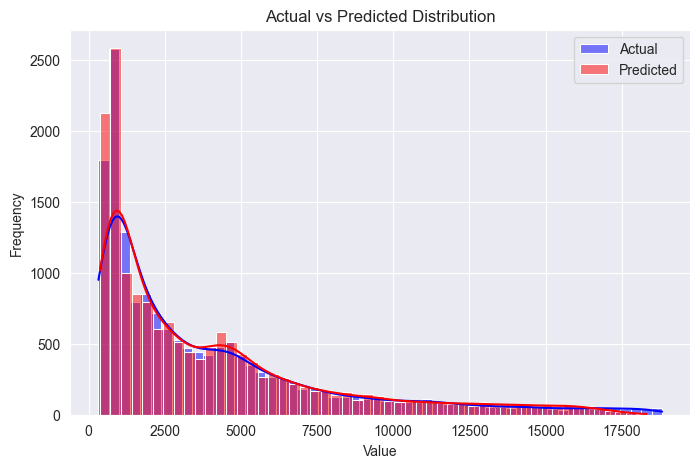

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# One figure and one axis
fig, ax = plt.subplots(figsize=(8, 5))

# Overlay both histograms on the same axis
sns.histplot(temp_df["Actual"], color='blue', label='Actual', kde=True, ax=ax, alpha=0.5)
sns.histplot(temp_df["Predicted"], color='red', label='Predicted', kde=True, ax=ax, alpha=0.5)

# Labels and title
ax.set_title("Actual vs Predicted Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

plt.show()


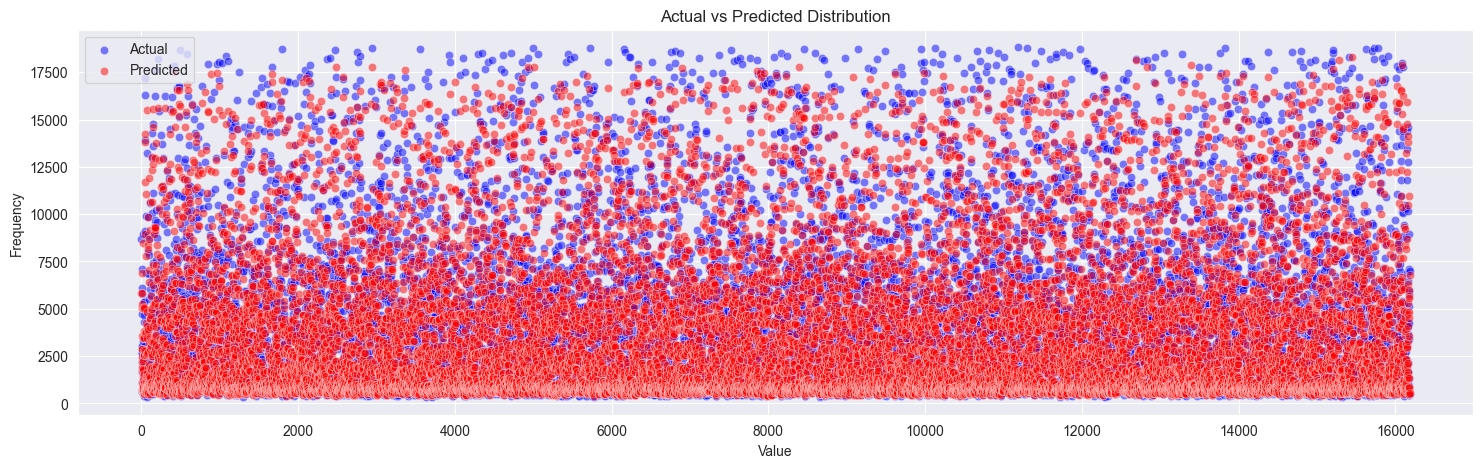

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# One figure and one axis
fig, ax = plt.subplots(figsize=(18, 5))

# Overlay both histograms on the same axis
sns.scatterplot(temp_df["Actual"], color='blue', label='Actual', ax=ax, alpha=0.5)
sns.scatterplot(temp_df["Predicted"], color='red', label='Predicted', ax=ax, alpha=0.5)

# Labels and title
ax.set_title("Actual vs Predicted Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

plt.show()


# Judging the performance of the regression model


## Mean Absolute Error

In [219]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean absolute error",mean_absolute_error(y,y_test_pred))

Mean absolute error 428.4609318996416


In [220]:
print("Mean squared error",mean_squared_error(y,y_test_pred))

Mean squared error 723514.8139957978


In [221]:
print("root mean square error",np.sqrt(mean_squared_error(y,y_test_pred)))

root mean square error 850.5967399395543


# conclusion:

- while evaluating the KNN regressor, the concept of "percentage accuracy" is not directly applicable in the same way as it is for
classification type of models.

- For regression tasks the goal is to achieve or to predict the continuous numerical value, not any category.
- Therefore metrics like accuracy which measure the proportion of correct predictions are not suitable.
- instead we judge the performance with the error metrics.

- MAE (mean absolute error): This measures the average absolute difference between predicted and actual value.
- MSE (mean sqaured error): the avreage of the sqaured distance between predicted and actual values. It penalizes larger error more
heavily.
- RMSE (Root mean squared error): This is sqaure root of MSE and often preferred because it is in the same units as the target variable.


## we are considering the root mean squared error:

- RMSE represents average prediction error- typically the distance between your model's prediction price and the actual price.
- RMSE= 810.05 my model's price prediction are off by 810 units. (eg. 810 rs, $810 ,etc)

- how to to tell if it is good performance or bad

In [222]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [223]:
850.5967399395543/3932.799722

0.2162827502202397

In [224]:
# 21.6 percent of error

- RMSE = 810 - your model's predictions are off by 810 price units on average.
- Whether that's acceptable depends on how large the prices typicallyl are.
- To make this meaningful, compare RMSE to:
- The mean or median price, or
- The standard deviation of prices.

# KNN Classification

In [225]:
import pandas as pd
df=pd.read_csv(r"C:\Users\karth\Downloads\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [226]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [227]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [228]:
x=df.iloc[:,1:4]
y=df.iloc[:,4:]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [229]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56)
x_test

,Gender,Age,EstimatedSalary
79,Female,26,17000
112,Male,38,61000
164,Female,33,69000
185,Male,31,66000
180,Male,26,16000
...,...,...,...
198,Male,26,80000
172,Female,26,118000
99,Female,28,37000
351,Male,37,75000


In [230]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(drop="first", sparse_output=False)

one_hot_encoded=encoder.fit_transform(x_train[["Gender"]])
x_train_enc=pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["Gender"]),index=x_train[["Gender"]].index)

In [231]:
#enc=OneHotEncoder(drop="first", sparse_output=False)

one_hot_encoded=encoder.transform(x_test[["Gender"]])
x_test_enc=pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["Gender"]),index=x_test[["Gender"]].index)

In [232]:
import numpy as np
round(np.sqrt(x_train_enc.shape[0]))
x_train_enc=np.array(x_train_enc)
y_train=np.array(y_train)

In [233]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train_enc,y_train)


C:\Users\karth\Documents\Machine learning\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,17
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [234]:
y_pred=knn.predict(x_test_enc.values)

In [235]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [236]:
y_test

,Purchased
79,0
112,0
164,0
185,0
180,0
...,...
198,0
172,0
99,0
351,0


In [237]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6416666666666667

# Error or accuracy metrics in classification models.

- Confusion matrix
- accuracy score
- precision
- recall


In [238]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)



array([[77,  0],
       [43,  0]])

In [239]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        77
           1       0.00      0.00      0.00        43

    accuracy                           0.64       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.41      0.64      0.50       120



C:\Users\karth\Documents\Machine learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\karth\Documents\Machine learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\karth\Documents\Machine learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me